In [2]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cerveza = imageio.imread('../ejemplo-opencv-imagen-en-imagen/imagenes-para-mostrar/cerveza.jpg')

In [4]:
cerveza.shape

(5307, 3538, 3)

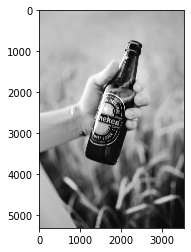

In [8]:
plt.imshow(cerveza[:, :, 0], cmap='gray')

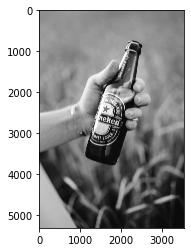

In [9]:
plt.imshow(cerveza[:, :, 1], cmap='gray')

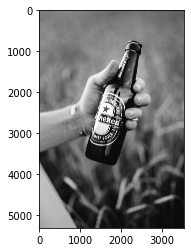

In [10]:
plt.imshow(cerveza[:, :, 2], cmap='gray')

In [12]:
arroz = imageio.imread('../ejemplo-opencv-imagen-en-imagen/imagenes-para-mostrar/rice-bowl.png')

In [13]:
arroz.shape

(512, 512, 4)

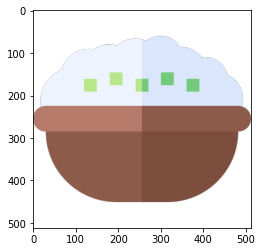

In [14]:
plt.imshow(arroz)

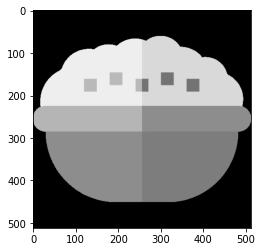

In [15]:
plt.imshow(arroz[:, :, 0], cmap='gray')

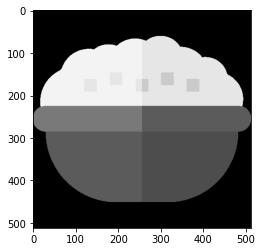

In [16]:
plt.imshow(arroz[:, :, 1], cmap='gray')

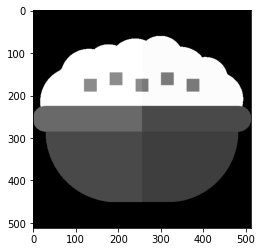

In [17]:
plt.imshow(arroz[:, :, 2], cmap='gray')

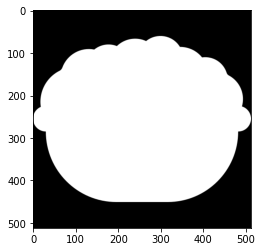

In [24]:
plt.imshow(arroz[:, :, 3], cmap='gray')

In [21]:
np.unique(arroz[:, :, 3])

Array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

In [14]:
stormtrooper = imageio.imread('../../proyecto/imagenes/stormtrooper-ojos-transparentes.png')

In [20]:
mascara2d = stormtrooper.sum(axis=-1)

In [34]:
suma_columnas = mascara2d.sum(axis=0)

In [39]:
(suma_columnas != 0).tolist().index(True)

85

In [46]:
suma_columnas.shape[0] - (suma_columnas != 0)[::-1].tolist().index(True) 

427

In [52]:
suma_filas = mascara2d.sum(axis=1)

In [54]:
(suma_filas != 0).tolist().index(True)

78

In [55]:
suma_filas.shape[0] - (suma_filas != 0)[::-1].tolist().index(True) 

434

In [50]:
np.stack([np.arange(4),
         np.arange(4),
         np.arange(4),
         np.arange(4)])#.sum(axis=1)
         

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

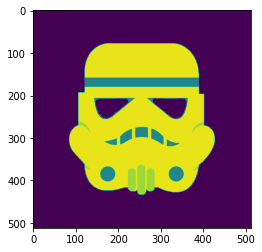

In [23]:
plt.imshow(mascara2d)

In [27]:
stormtrooper.shape

(512, 512, 4)

In [28]:
x = 2000
y = 1000

In [66]:
cerveza_con_mascara = cerveza.copy() 

### REEMPLAZAR LA IMAGEN DE FONDO ORIGINAL CON LA IMAGEN DEL FRENTE (SE IGNORA LA OPACIDAD)

In [32]:
cerveza_con_mascara[y:y+512, x:x+512, :] = stormtrooper[:, :, :3]

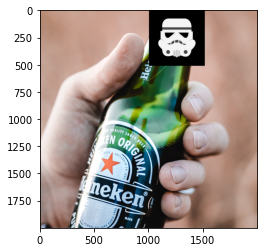

In [36]:
plt.imshow(cerveza_con_mascara[1000:3000, 1000:3000, :])

### MEZCLAR LA IMAGEN DE FONDO CON LA IMAGEN DEL FRENTE USANDO LA INFORMACION DEL CANAL DE OPACIDAD

In [80]:
# normalizar la opacidad
opacidad = stormtrooper[:,:,3]/255
imagen_3_canales = np.zeros((stormtrooper.shape[0], stormtrooper.shape[1], 3))
imagen_3_canales[:,:,0] = stormtrooper[:,:,0] * opacidad
imagen_3_canales[:,:,1] = stormtrooper[:,:,1] * opacidad
imagen_3_canales[:,:,2] = stormtrooper[:,:,2] * opacidad

cerveza_con_mascara[y:y+512, x:x+512, :] = (1-np.stack([opacidad, opacidad, opacidad], axis=-1)) * cerveza_con_mascara[y:y+512, x:x+512, :] + imagen_3_canales

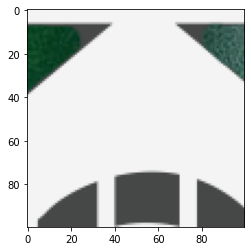

In [86]:
plt.imshow(cerveza_con_mascara[1200:1300, 2200:2300, :])

In [79]:
np.stack([opacidad, opacidad, opacidad], axis=-1).shape

(512, 512, 3)

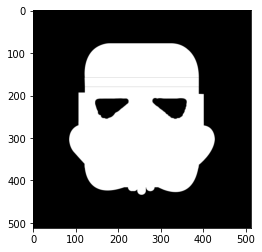

In [38]:
plt.imshow(stormtrooper[:,:,3], cmap="gray")

In [39]:
canal = np.array([[3,3,3],
                  [3,3,3],
                  [3,3,3],])

In [41]:
opacidad = np.array([[0,0,1],
                     [0.3,0.5,0],
                     [0.3,0.5,0],])

In [43]:
canal

array([[3, 3, 3],
       [3, 3, 3],
       [3, 3, 3]])

In [44]:
opacidad

array([[0. , 0. , 1. ],
       [0.3, 0.5, 0. ],
       [0.3, 0.5, 0. ]])

In [42]:
canal * opacidad

array([[0. , 0. , 3. ],
       [0.9, 1.5, 0. ],
       [0.9, 1.5, 0. ]])

In [58]:
fondo = 255  # blanco (escala de grises)

In [62]:
imagen = 100 # negro

In [63]:
opacidad = 0.5
transparencia = 1 - opacidad # 1 = totalmente opaco

In [64]:
(1 - opacidad) * fondo + opacidad * imagen

177.5

In [8]:
x = cerveza[:,:,0]

In [12]:
cerveza.shape[:2]

(5307, 3538)